Project root added to sys.path: d:\Handwritten Digit Recognition

 Test Accuracy: 0.9686
⏱ Training time: 0.13 sec
⏱ Prediction time: 13.26 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



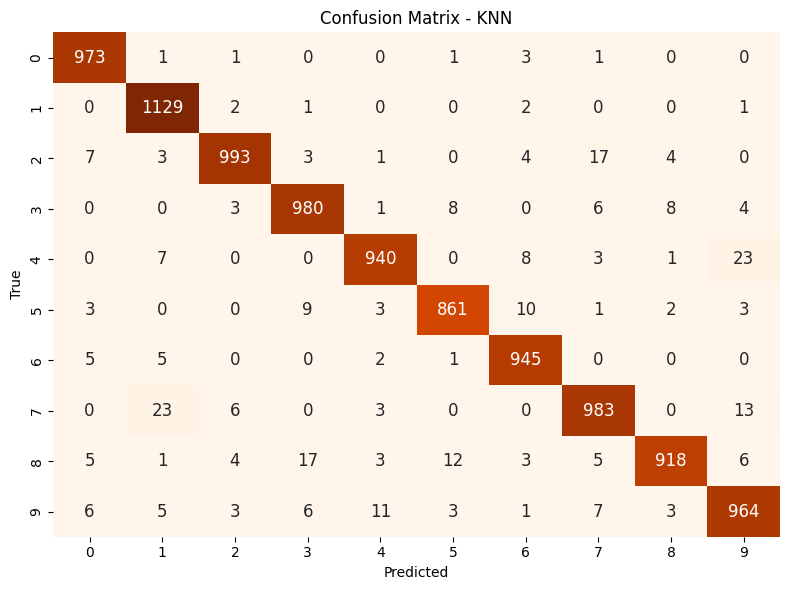

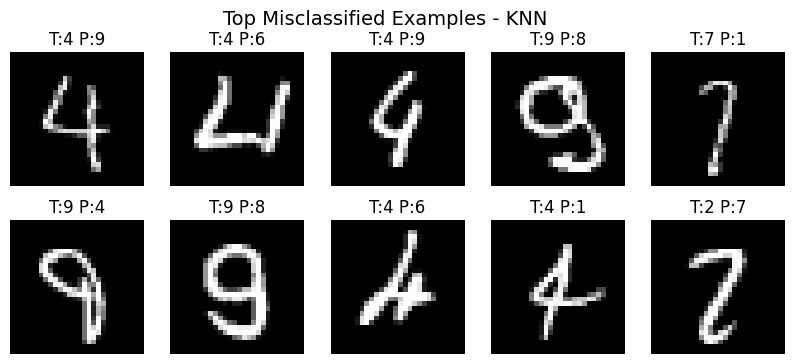

In [1]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Take a subset
subset_size = 25000
X_train_sub = X_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]

# PCA to reduce dimensionality
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_sub)
X_test_pca = pca.transform(X_test_flat)

# Initialize KNN with 5 neighbors and kd_tree algorithm for faster search
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

# Train KNN (stores training data)
start_train = time.time()
knn_model.fit(X_train_pca, y_train_sub)
end_train = time.time()

# Predict
start_pred = time.time()
y_pred_knn = knn_model.predict(X_test_pca)
end_pred = time.time()

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"\n Test Accuracy: {acc_knn:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

# Show misclassified examples
misclassified_idx_knn = np.where(y_pred_knn != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx_knn[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_knn[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - KNN", fontsize=14)
plt.show()

In [2]:
import os
import pandas as pd
import joblib

# Path for accuracy log file
ACC_LOG = "results/model_accuracies.csv"

# Append model name + accuracy
model_name = "K Nearest Neighbours"  

results_dir = os.path.join("..", "results")
os.makedirs(results_dir, exist_ok=True)
results_file = os.path.join(results_dir, "accuracies.csv")

# Append or Create CSV
if os.path.exists(results_file):
    df = pd.read_csv(results_file)
    df = df[["model_name", "accuracy_value"]] if "accuracy_value" in df.columns else pd.DataFrame(columns=["model_name", "accuracy_value"])
else:
    df = pd.DataFrame(columns=["model_name", "accuracy_value"])

# Remove old entry if model already logged (to avoid duplicates)
df = df[df["model_name"] != model_name]

# Add new row
df = pd.concat([df, pd.DataFrame([{
    "model_name": model_name,
    "accuracy_value": acc_knn
}])], ignore_index=True)

# Save
df.to_csv(results_file, index=False)

# Save model
joblib.dump(knn_model, f"../results/{model_name}.pkl")

print(f"Accuracy logged for model '{model_name}' in {results_file}")
print(f"Model saved as ../results/{model_name}.pkl")

Accuracy logged for model 'K Nearest Neighbours' in ..\results\accuracies.csv
Model saved as ../results/K Nearest Neighbours.pkl
